## KMeans Cluster Analysis

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('./data/strippeddata.csv')
data.head()

,good_logs_num,neutral_logs_num,bad_logs_num,difficulty,terrain,size,status,is_premium,short_description,long_description,...,cache_type_Maze Exhibit,cache_type_Mega event,cache_type_Multi,cache_type_Traditional,cache_type_Unknown/Mystery,cache_type_Virtual,cache_type_Webcam,cache_type_Wherigo,sentiment,index
0,9,0,1,2.0,1.5,1.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0.9730,81005400.09
1,1,3,2,1.5,1.5,2.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.9797,80987400.49
2,7,2,0,1.5,1.5,2.0,1,0,0,1,...,0,0,0,1,0,0,0,0,-0.9134,80969402.89
3,10,0,0,2.0,3.0,3.0,1,0,1,1,...,0,0,0,0,1,0,0,0,0.9958,80951407.29
4,5,2,0,1.5,2.5,1.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.9744,80933413.69


In [3]:
X = data.drop(columns=['index'])
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
k = 10
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_sc)
X_new = X.copy()
X_new['cluster'] = km.labels_

In [5]:
def plot_labels(col,k):

    N = X_new[col].nunique()
    
    if N<=4:
        a=2
    elif N<=9:
        a=3
    elif N<=16:
        a=4
    else:
        print('This function only works for a column with 16 or fewer unique values')
        return -1
    
    fig = plt.figure(figsize=(8,8));
    
    values = X[col].unique()
    values.sort()
    for j,val in enumerate(values):
        
        ax = fig.add_subplot(a,a,j+1);
        plt.hist(X_new[X_new[col]==val]['cluster'], bins=list(range(0,k+1)),label=col +' = '+ str(val));
        plt.legend()
        
 

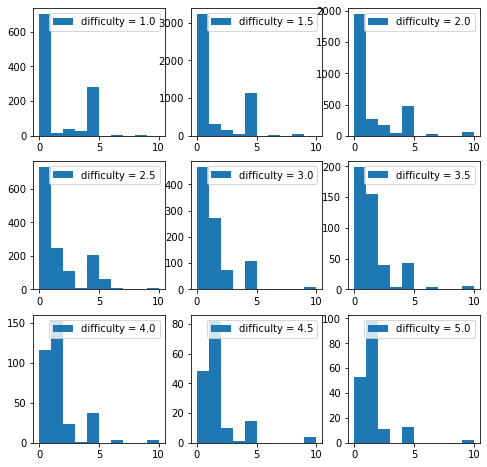

In [6]:
plot_labels('difficulty',k)

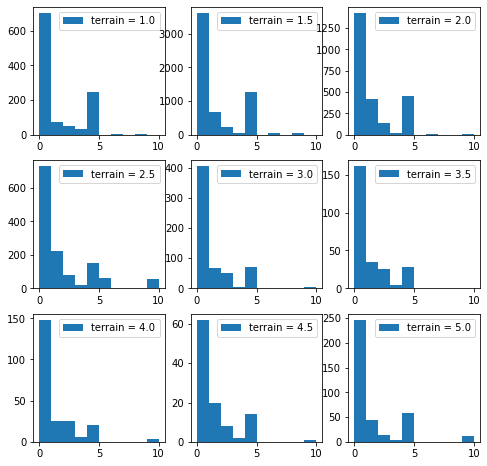

In [7]:
plot_labels('terrain',k)

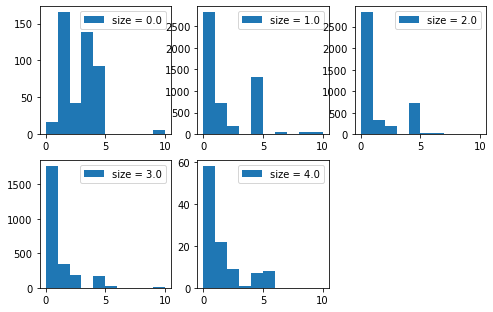

In [8]:
plot_labels('size',k)

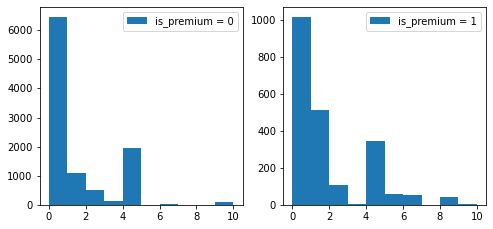

In [9]:
plot_labels('is_premium',k)

In [10]:
scores = []
for k in range(10,210,10):
    cl = KMeans(n_clusters=k, random_state=42)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    print(k)
    
score_df = pd.DataFrame(scores)
score_df.columns = ['K', 'inertia', 'silhouette']


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


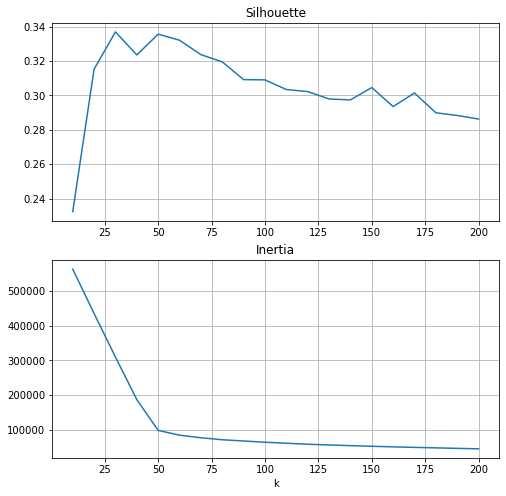

In [11]:
fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(2,1,1);
plt.plot(score_df['K'],score_df['silhouette']);
plt.title('Silhouette');
plt.grid();
ax = fig.add_subplot(2,1,2);
plt.plot(score_df['K'],score_df['inertia']);
plt.title('Inertia');
plt.xlabel('k');
plt.grid();

The ideal k looks like about 50. I'll do a more fine grained search:

In [12]:
scores = []

k_vals = [2, 10] + list(range(40,61)) + [70, 80]
for k in k_vals:
    cl = KMeans(n_clusters=k, random_state=42)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    print(k)
    
score_df2 = pd.DataFrame(scores)
score_df2.columns = ['K', 'inertia', 'silhouette']


2
10
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
70
80


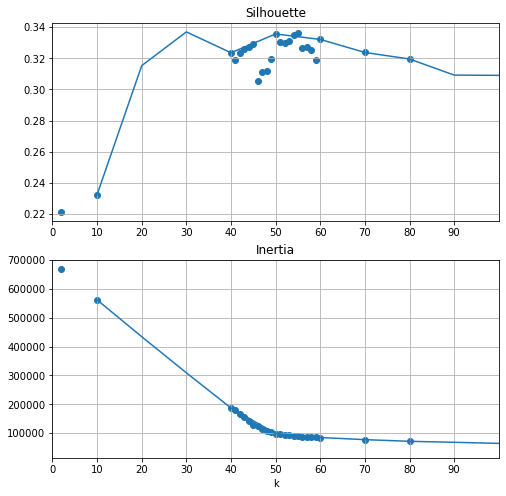

In [13]:
fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(2,1,1);
plt.plot(score_df['K'],score_df['silhouette']);
plt.scatter(score_df2['K'],score_df2['silhouette']);
plt.title('Silhouette');
plt.xlim([0, 100]);
plt.xticks(list(range(0,100,10)));
plt.grid();
ax = fig.add_subplot(2,1,2);
plt.plot(score_df['K'],score_df['inertia']);
plt.scatter(score_df2['K'],score_df2['inertia']);
plt.title('Inertia');
plt.xlabel('k');
plt.xlim([0, 100])
plt.xticks(list(range(0,100,10)));
plt.grid();

So k = 50 does seem like the best choice, still.

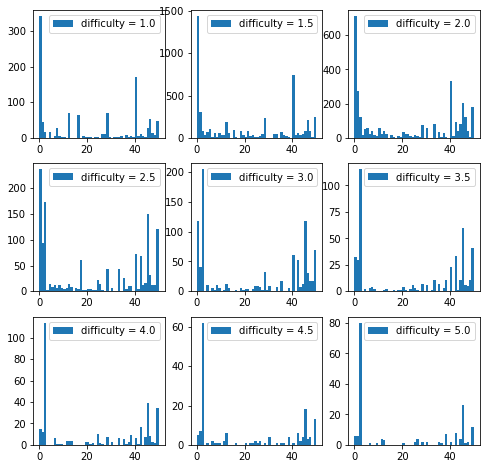

In [14]:
k = 50
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_sc)
X_new = X.copy()
X_new['cluster'] = km.labels_

plot_labels('difficulty',k)

In [20]:
inertia = km.inertia_
sil = silhouette_score(X_sc, km.labels_)
print(f'Silhouette: {sil}, Inertia: {inertia}')

Silhouette: 0.335615866756178, Inertia: 98510.66042252586


In [21]:
X_new['cluster'] = km.labels_

In [133]:
cnt = np.array([(X_new[X_new['cluster']==c]['sentiment'].count()) for c in clusters])


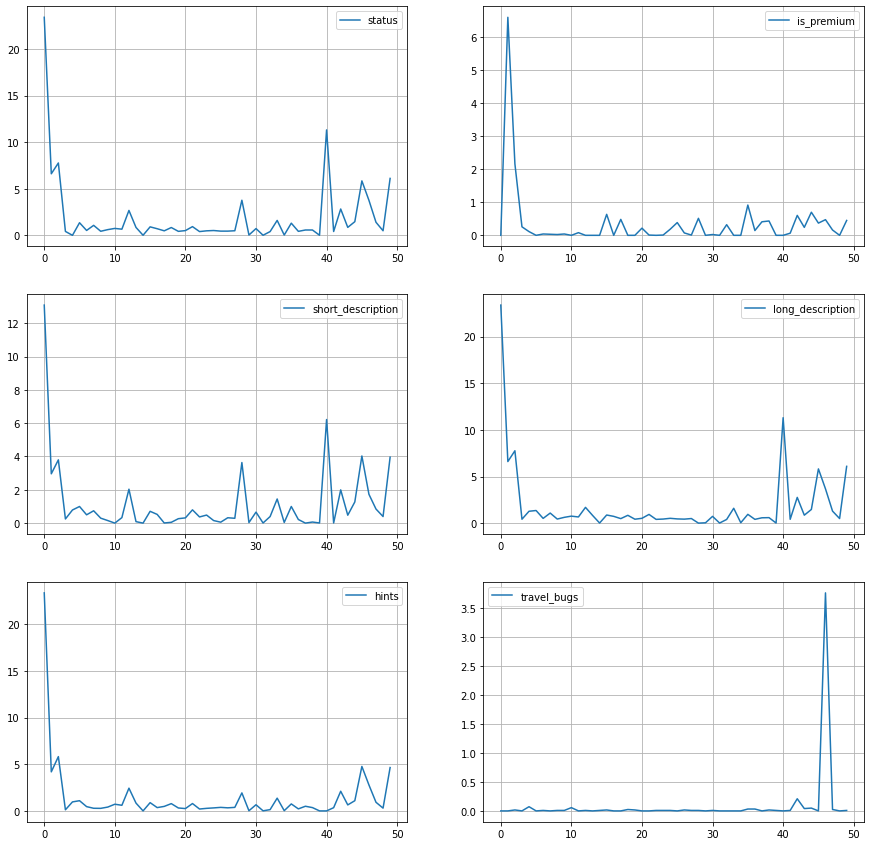

In [60]:
cols_bin = ['status', 'is_premium', 'short_description', 'long_description', 'hints', 'travel_bugs']

c=0
N = X_new.shape[0]
fig = plt.figure(figsize=(15,15));
for j,col in enumerate(cols_bin):
    pct_1 = [sum(X_new[X_new['cluster']==c][col])*100/N for c in clusters]
    ax = fig.add_subplot(3,2,j+1);
    plt.plot(clusters,pct_1,label=col);
    plt.legend()
    plt.grid()

Notes:

0: 
Much more likely to have both long and short description, plus hint(s);
Much less likely to be disabled;
Is probably not premium

1:
Much more likely to be premium access only

3: 
Somewhat more likely to have both short & long description;
Somewhat more likely to have hint(s)

12:
Somewhat more likely to have both short & long description

28:
Somewhat more likely to have both short & long description

40:
Moderately less likely to be disabled;
Is probably not premium;
Somewhat more likely to have both short & long description

45: 
Somewhat more likely to have both short & long description;
Somewhat more likely to have hint(s)

46: 
Much more likely to acquire travel bugs

49: 
Somewhat more likely to have both short & long description;
Somewhat more likely to have hint(s)


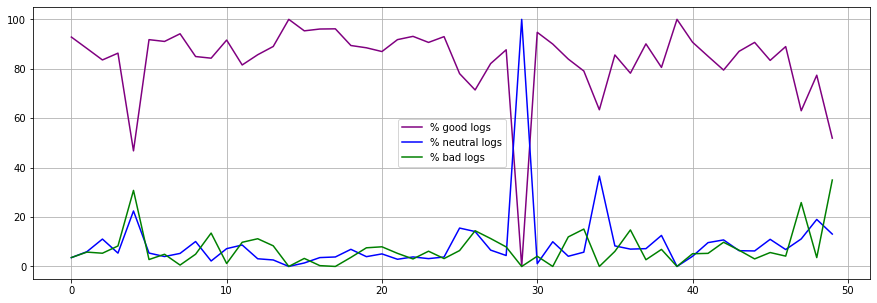

In [67]:

good = np.array([sum(X_new[X_new['cluster']==c]['good_logs_num'])for c in clusters])
neut = np.array([sum(X_new[X_new['cluster']==c]['neutral_logs_num']) for c in clusters])
bad  = np.array([sum(X_new[X_new['cluster']==c]['bad_logs_num']) for c in clusters])
totl = good + neut + bad
good = good*100/totl
neut = neut*100/totl
bad  = bad*100/totl

fig = plt.figure(figsize=(15,5));
plt.plot(clusters,good,color='purple',label='% good logs');
plt.plot(clusters,neut,color='blue',label='% neutral logs');
plt.plot(clusters,bad, color='green',label='% bad logs');
plt.legend();
plt.grid();


Notes:

4: 
Good type logs are somewhat fewer than normal, neutral and bad types are somewhat higher than normal

29:
100% of the logs are neutral type

34:
Neutral type logs are somewhat increased, good type still present but decreased

47:
Good type logs somewhat decreased, bad types somewhat increased

49:
Good type logs somewhat decreased, bad types somewhat increased


nan

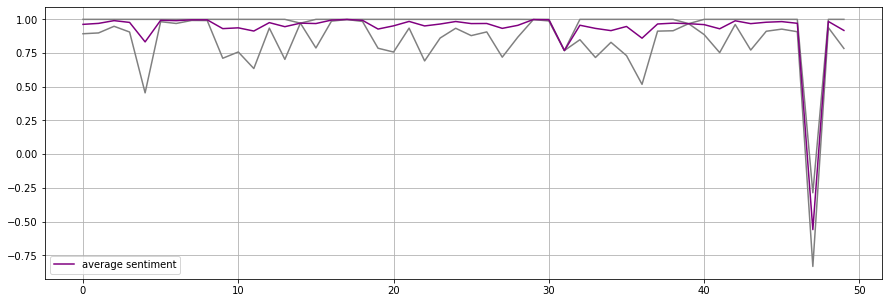

In [137]:
sent = np.array([(X_new[X_new['cluster']==c]['sentiment'].mean()) for c in clusters])
sent_sd = np.array([(X_new[X_new['cluster']==c]['sentiment'].std()) if cnt[j]>1 else 0 for j,c in enumerate(clusters)])
sent1 = sent+sent_sd
sent1 = [s if s<=1 else 1 for s in sent1]
sent2 = sent-sent_sd
sent2 = [s if s>=-1 else -1 for s in sent2]
fig = plt.figure(figsize=(15,5));

plt.plot(clusters,sent1,color='grey');
plt.plot(clusters,sent2,color='grey');
plt.plot(clusters,sent,color='purple',label='average sentiment');
plt.legend();
plt.grid();


Notes:

4:
log sentiment somewhat decreased, moderate variability

47:
log sentiment decreased a lot, very consistently bad


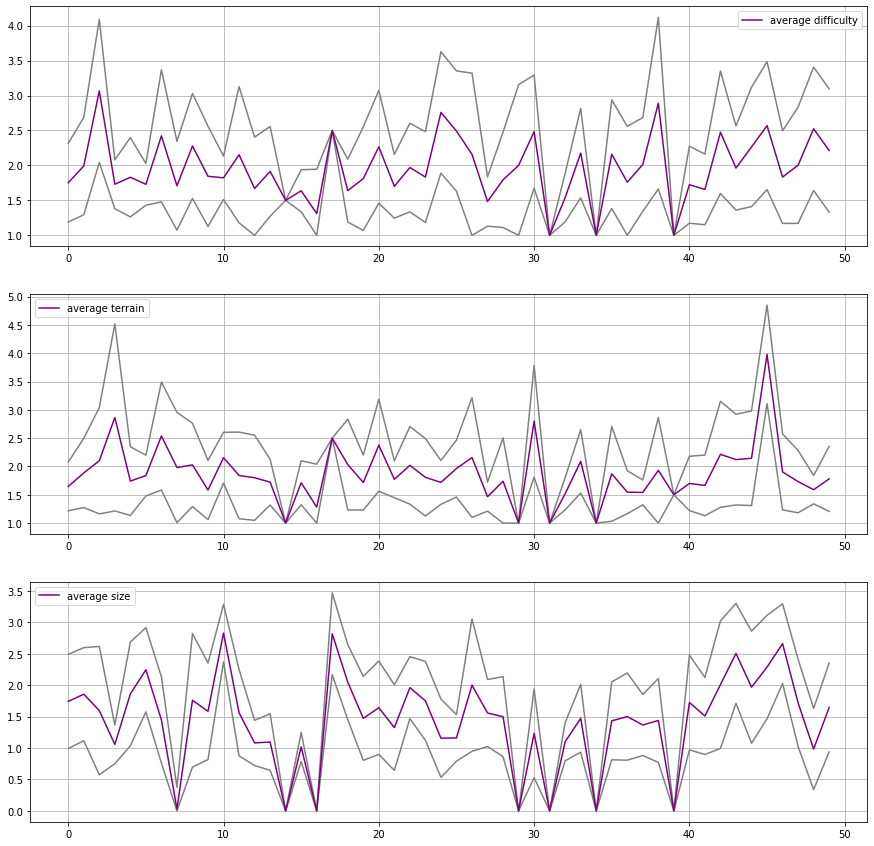

In [138]:
cols_param = ['difficulty', 'terrain', 'size']
a = [1, 1, 0]
b = [5, 5, 4]

fig = plt.figure(figsize=(15,15));

for j,col in enumerate(cols_param):
    
    d_mn = np.array([(X_new[X_new['cluster']==c][col].mean()) for c in clusters])
    d_sd = np.array([(X_new[X_new['cluster']==c][col].std()) if cnt[j]>1 else 0 for j,c in enumerate(clusters)])
    d1 = d_mn+d_sd
    d1 = [d if d<=b[j] else b[j] for d in d1]
    d2 = d_mn-d_sd
    d2 = [d if d>=a[j] else a[j] for d in d2]

    ax = fig.add_subplot(3,1,j+1);
    plt.plot(clusters,d1,color='grey');
    plt.plot(clusters,d2,color='grey');
    plt.plot(clusters,d_mn,color='purple',label='average '+col);
    plt.legend();
    plt.grid();


Notes:

2:
Somewhat more difficult than normal

3: 
Somewhat rougher terrain, more variable

7: 
Consistently size=0 (more likely to have no container)

10:
Fairly consistently size of 2-3 (small-regular)

16:
100% size = 0 (non-container cache)

17:
All difficulty = 2.5;
All terrain = 2.5;
Likely to be size = 3 (regular)

34:
100% difficulty 1;
100% terrain 1;
100% size=0 (non-container)

45: 
Rougher than normal terrain, fairly consistent


## Summary notes for these clusters:

| cluster # | number of caches | noted characteristics |
|--- |---   |--- |
| 0  | 2908 | |
| 1  | 821  | Much more likely to be premium access only |
| 2  | 965  | Somewhat more difficult than normal |
| 3  | 52   | Somewhat more likely to have both short & long description; Somewhat more likely to have hint(s); Somewhat rougher terrain, more variable |
| 4  | 165  | Good type logs are somewhat fewer than normal, neutral and bad types are somewhat higher than normal; log sentiment somewhat decreased, moderate variability |
| 5  | 168  | |
| 6  | 65   | |
| 7  | 134  | Consistently size=0 (more likely to have no container) |
| 8  | 54   | |
| 9  | 77   | |
| 10 | 93   | Fairly consistently size of 2-3 (small-regular) |
| 11 | 82   | |
| 12 | 332  | Somewhat more likely to have both short & long description |
| 13 | 105  | |
| 14 | 1    | |
| 15 | 113  | |
| 16 | 90   | 100% size = 0 (non-container cache) |
| 17 | 60   | All difficulty = 2.5; All terrain = 2.5; Likely to be size = 3 (regular) |
| 18 | 104  | |
| 19 | 53   | |
| 20 | 64   | |
| 21 | 117  | |
| 22 | 50   | |
| 23 | 60   | |
| 24 | 64   | |
| 25 | 56   | |
| 26 | 57   | |
| 27 | 61   | |
| 28 | 468  | Somewhat more likely to have both short & long description |
| 29 | 4    | 100% of the logs are neutral type |
| 30 | 90   | |
| 31 | 1    | | 
| 32 | 50   | |
| 33 | 199  | |
| 34 | 5    | Neutral type logs are somewhat increased, good type still present but decreased; 100% difficulty 1; 100% terrain 1; 100% size=0 (non-container) |
| 35 | 162  | |
| 36 | 54   | |
| 37 | 71   | |
| 38 | 73   | |
| 39 | 1    | |
| 40 | 1406 | Moderately less likely to be disabled; Is probably not premium; Somewhat more likely to have both short & long description |
| 41 | 51   | |
| 42 | 351  | |
| 43 | 107  | |
| 44 | 182  | |
| 45 | 726  | Somewhat more likely to have both short & long description; Somewhat more likely to have hint(s); Rougher than normal terrain, fairly consistent |
| 46 | 467  | Much more likely to acquire travel bugs |
| 47 | 174  | Good type logs somewhat decreased, bad types somewhat increased; log sentiment decreased a lot, very consistently bad|
| 48 | 61   | |
| 49 | 759  | Somewhat more likely to have both short & long description; Somewhat more likely to have hint(s); Good type logs somewhat decreased, bad types somewhat increased |

In [144]:
X_new['KMeans cluster'] = X_new['cluster']
X_new.drop(columns=['cluster'], inplace=True)

In [146]:
X_new.to_csv('./data/data_withKMeans.csv',index=False)

In [153]:
np.quantile(cnt,[0, 0.25, 0.5, 0.75, 1])

array([1.000e+00, 5.625e+01, 8.600e+01, 1.725e+02, 2.908e+03])

In [154]:
np.median(cnt)

86.0

In [165]:
code_name_label = data[['index']].copy()
code_name_label['label'] = X_new['KMeans cluster']
names = pd.read_csv('./data/names.csv')
codes = pd.read_csv('./data/codes.csv')

In [168]:
K0 = '0918273645.1425367.908.9012783465'

KEY = [pd.to_numeric(K0[7] +K0[0] +K0[24] +K0[20]+K0[10]+K0[8]), 
       pd.to_numeric(K0[13]+K0[20]+K0[0]  +K0[24]+K0[10]+K0[13]), 
       pd.to_numeric(K0[23]+K0[24]+K0[20] +K0[0] +K0[22]+K0[29])]


def NametoCode(n_list):
    A = [np.power(nn,0.5) for nn in n_list]
    c_list = [np.round(KEY[0]+aa) if aa%1>0.5 else np.round(KEY[0]-aa) for aa in A]
    c_list = [int(cc) for cc in c_list]
    return c_list

def OtherInfotoCode(z_list):
    A = [np.power(zz,0.5) for zz in z_list]
    c_list = [np.round(KEY[2]+aa) if aa%1>0.5 else np.round(KEY[2]-aa) for aa in A]
    c_list = [int(cc) for cc in c_list]
    return c_list

In [178]:
names['code_index'] = NametoCode(names['name_index'])
names = names.sort_values(by='code_index')

code_name_label['code_index'] = OtherInfotoCode(code_name_label['index'])
code_name_label = code_name_label.sort_values(by='code_index')
code_name_label['name'] = names['name']
code_name_label['code'] = codes['code']
code_name_label.drop(columns=['index', 'code_index'],inplace=True)
code_name_label.head()

,label,name,code
0,1,South River Trail: Triple Claw,GC1A1E7
1,49,Canada Traveler Challenge: 5 Provinces,GC92B2K
2,47,Milledge Mystery Renewed,GC90JDX
3,2,Guarding South Fulton #21,GCH72A
4,0,Hottest Park n Ride,GC8D3PX


In [180]:
code_name_label['name'].nunique(), code_name_label['code'].nunique()

(12433, 12433)

In [181]:
code_name_label.to_csv('./data/code_name_label.csv',index=False)